In [53]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj

from plot_trials_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du
FIGURES_PATH = du.get_figures_path("rats", "cohort1")

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# ANIMALS
ANIMAL_IDS = [
    "C214",
    "C215",
    "C220",
    "C221",
    "C222",
    "C223",
]
mode = "today"

if mode == "today":
    date = datetime.today().date()
    latest_date = None
elif mode == "yesterday":
    date = datetime.today().date() - timedelta(days=1)
    latest_date = date.strftime("%Y-%m-%d")

# DATES
date_min, date_max = dju.return_date_window(latest_date=latest_date, n_days_back=20)

In [5]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

no sessions found for C214 between 2024-06-14 and 2030-01-01
fetched 20 sessions for C215 between 2024-06-14 and 2024-07-04
fetched 14 sessions for C220 between 2024-06-14 and 2024-06-28
fetched 19 sessions for C221 between 2024-06-14 and 2024-07-02
fetched 20 sessions for C222 between 2024-06-14 and 2024-07-04
no sessions found for C223 between 2024-06-14 and 2030-01-01


In [7]:

days_df = create_days_df_from_dj(
    animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max, verbose=True
)

Fetched data from SessionAggDate table from 2024-06-14 to 2024-07-02  
Today's data exits and has been added to SessionAggDate.

73 daily summaries fetched for animals : 
['C214', 'C215', 'C220', 'C221', 'C222', 'C223']
 between 2024-06-14 and 2024-07-04


/Users/jessbreda/anaconda3/envs/bl_dj_310/lib/python3.10/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/jessbreda/anaconda3/envs/bl_dj_310/lib/python3.10/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/jessbreda/anaconda3/envs/bl_dj_310/lib/python3.10/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


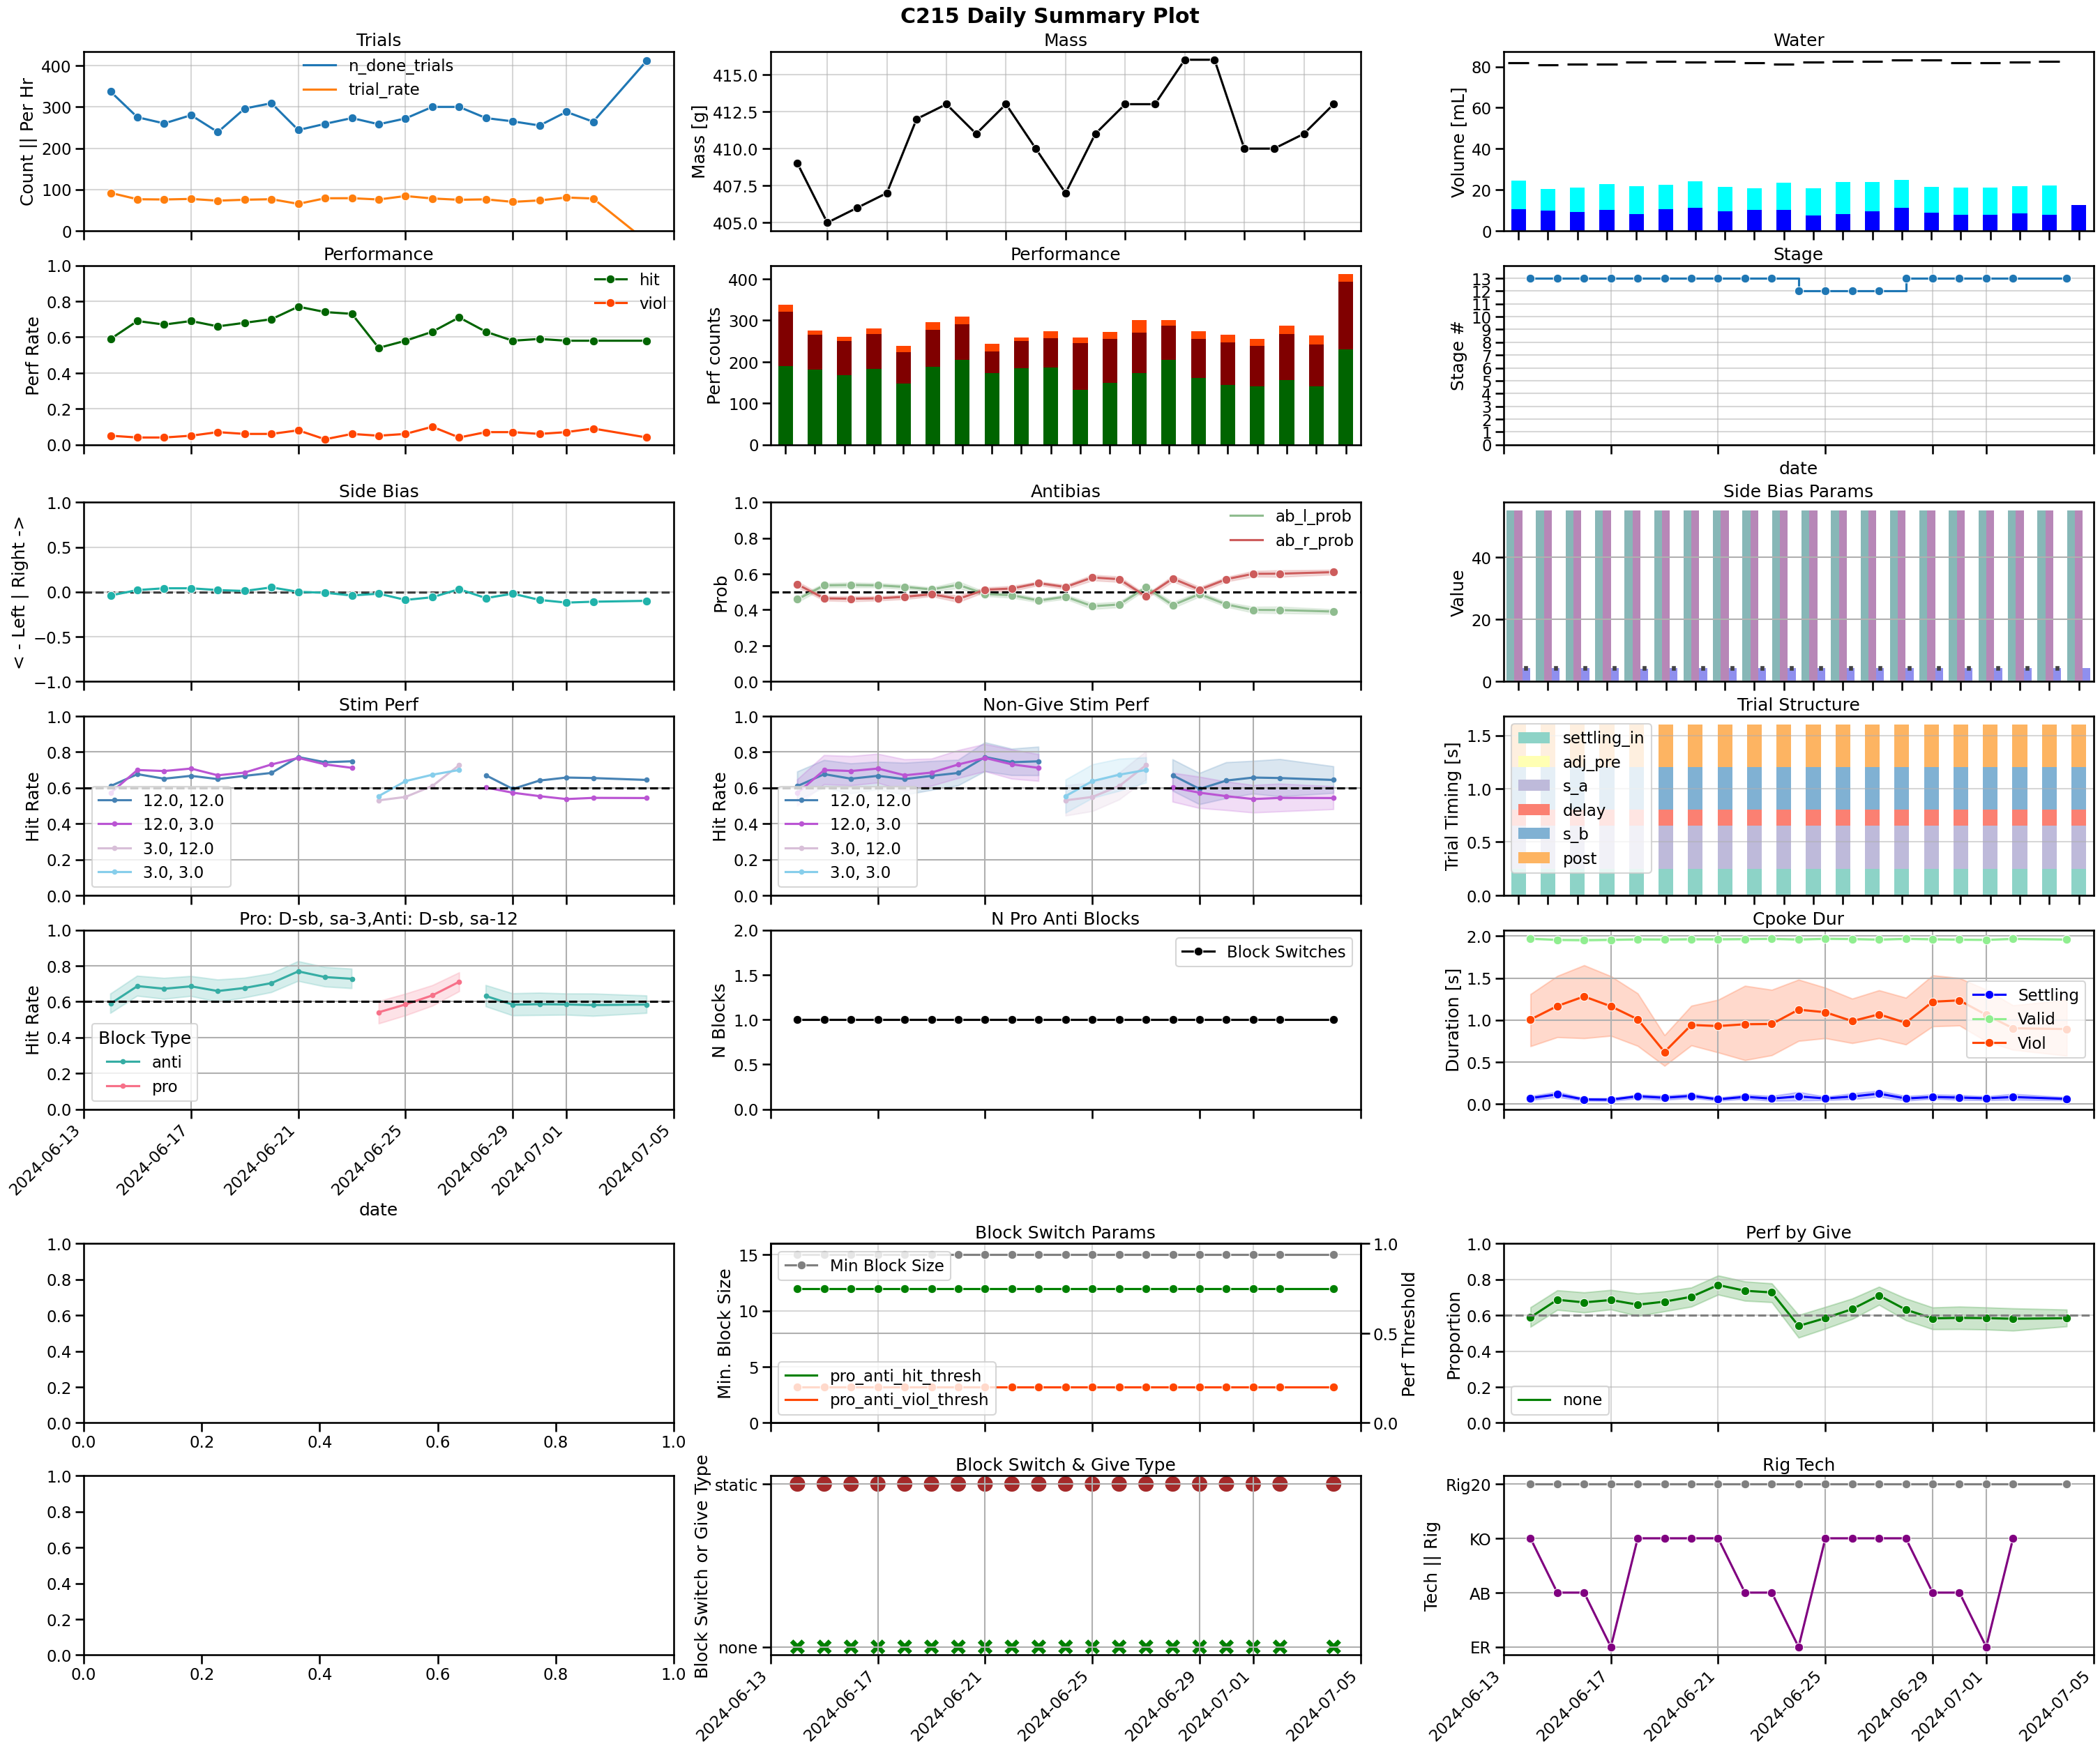

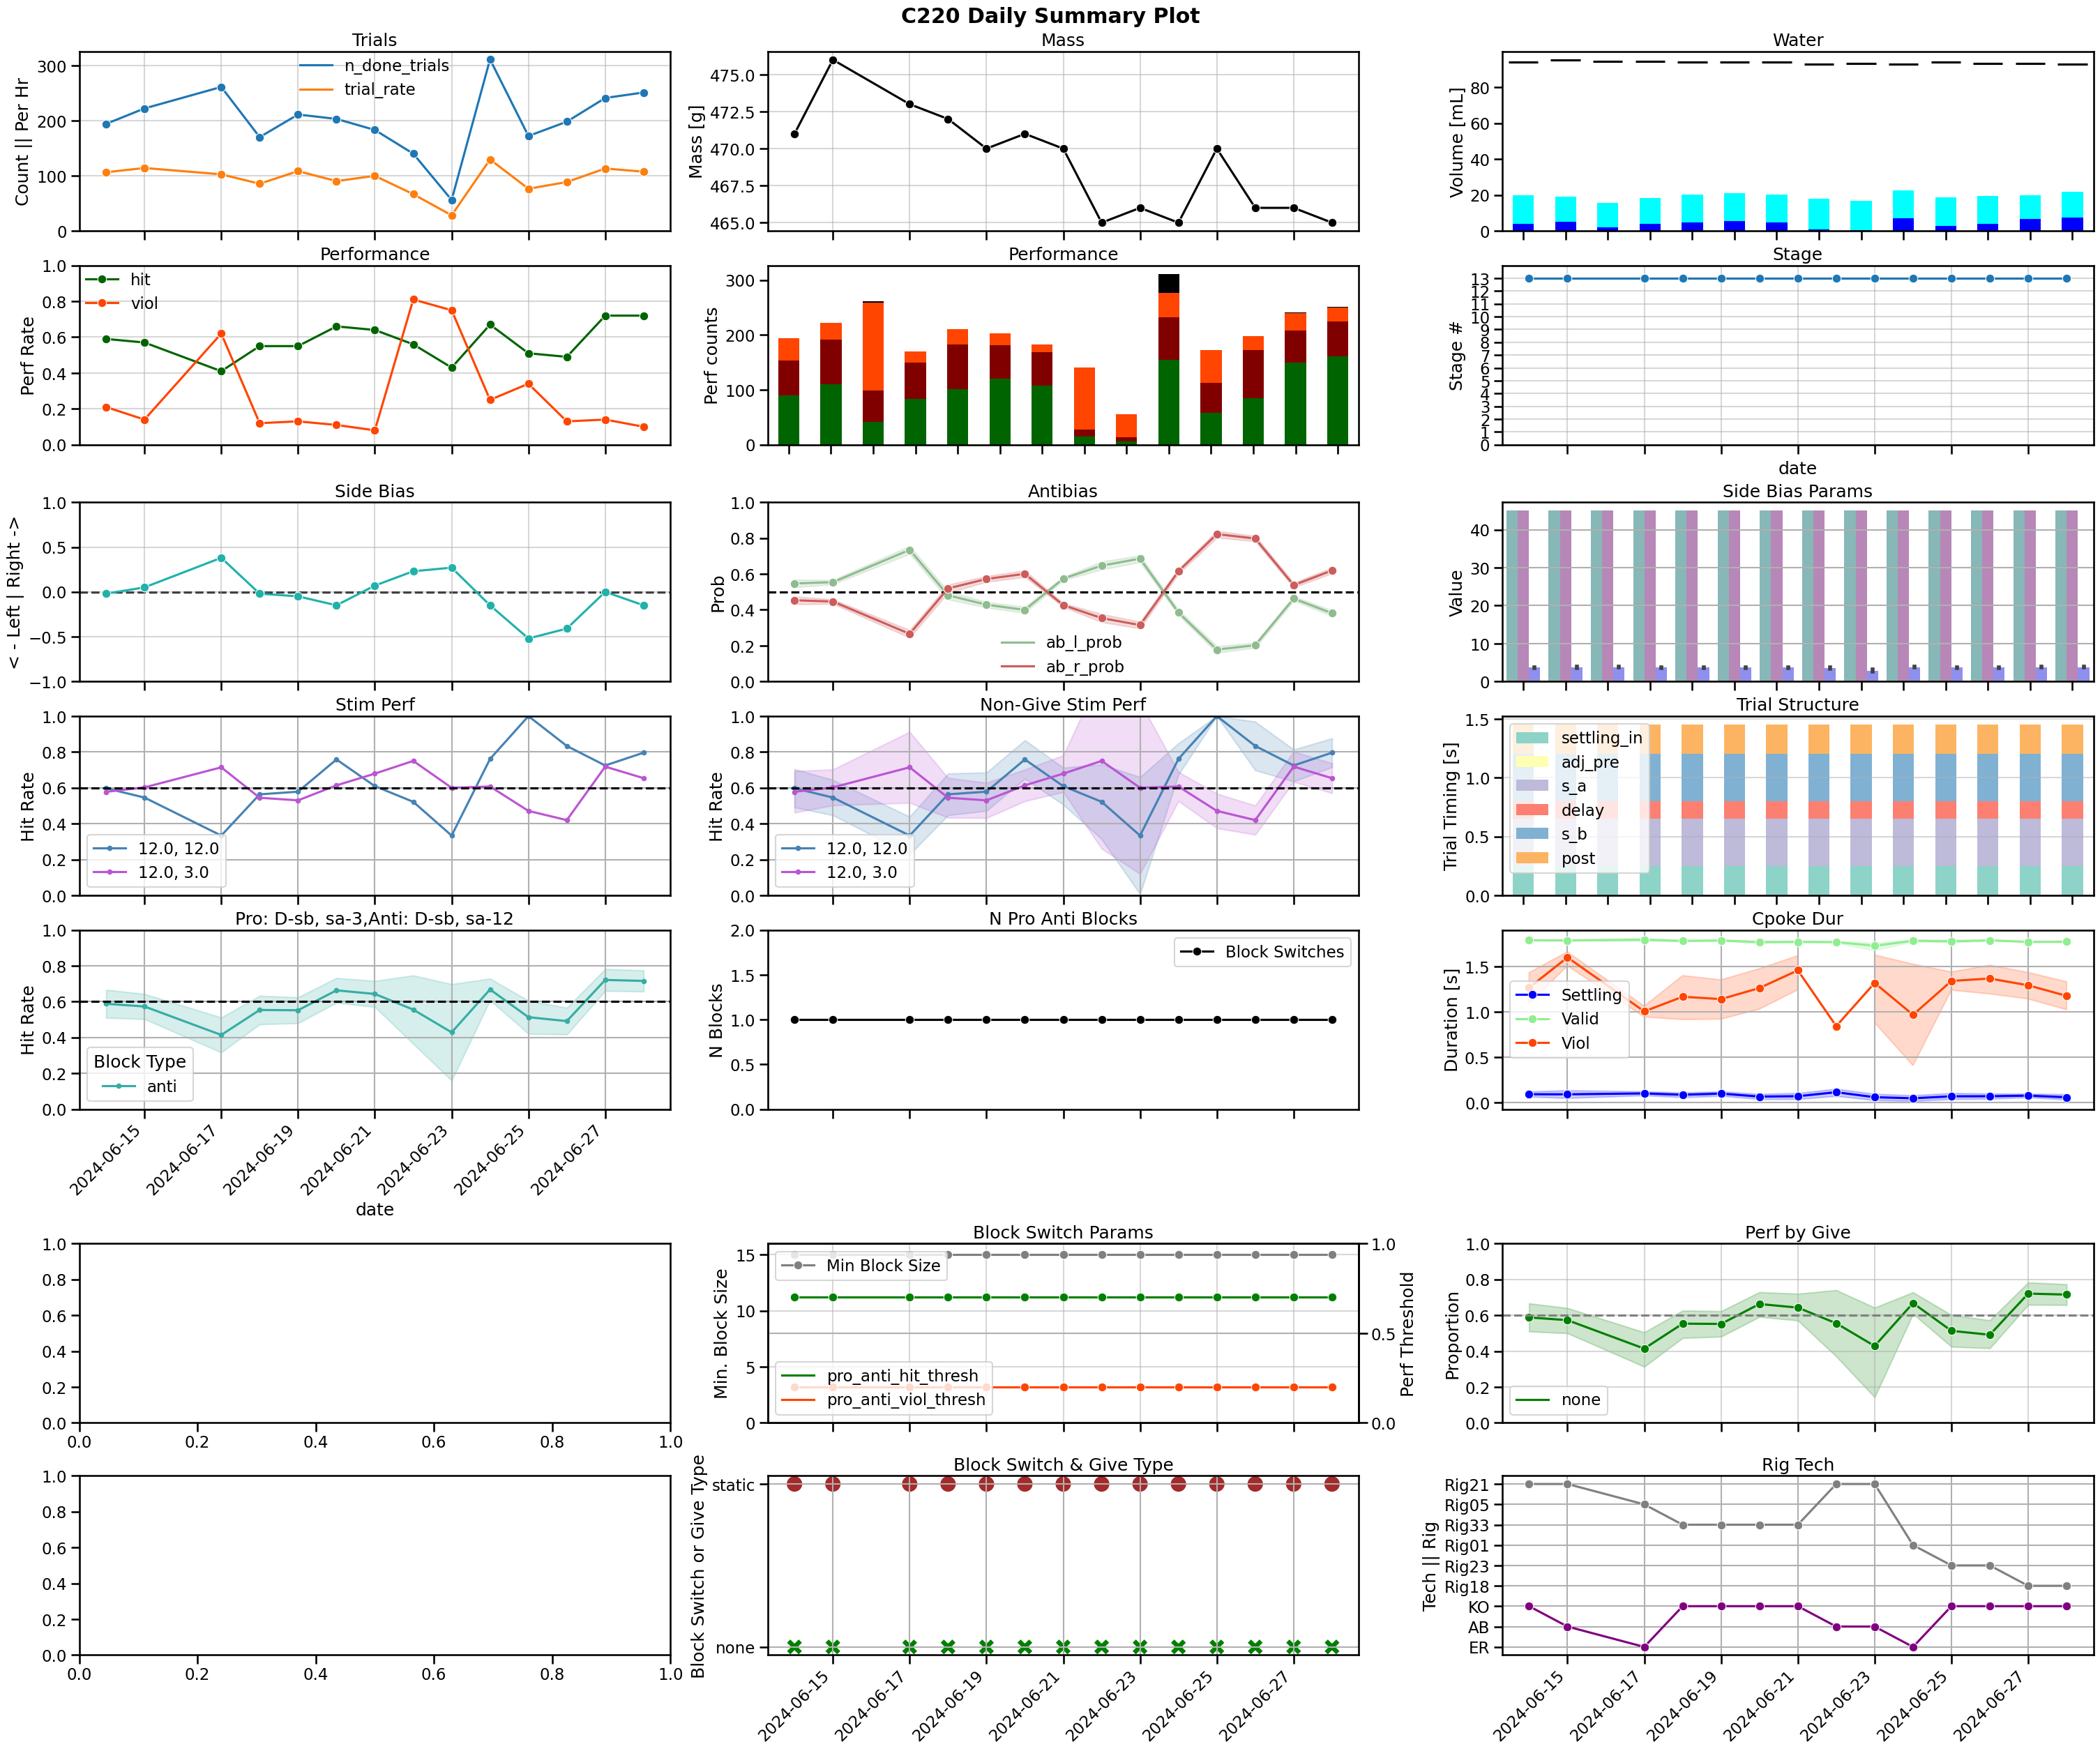

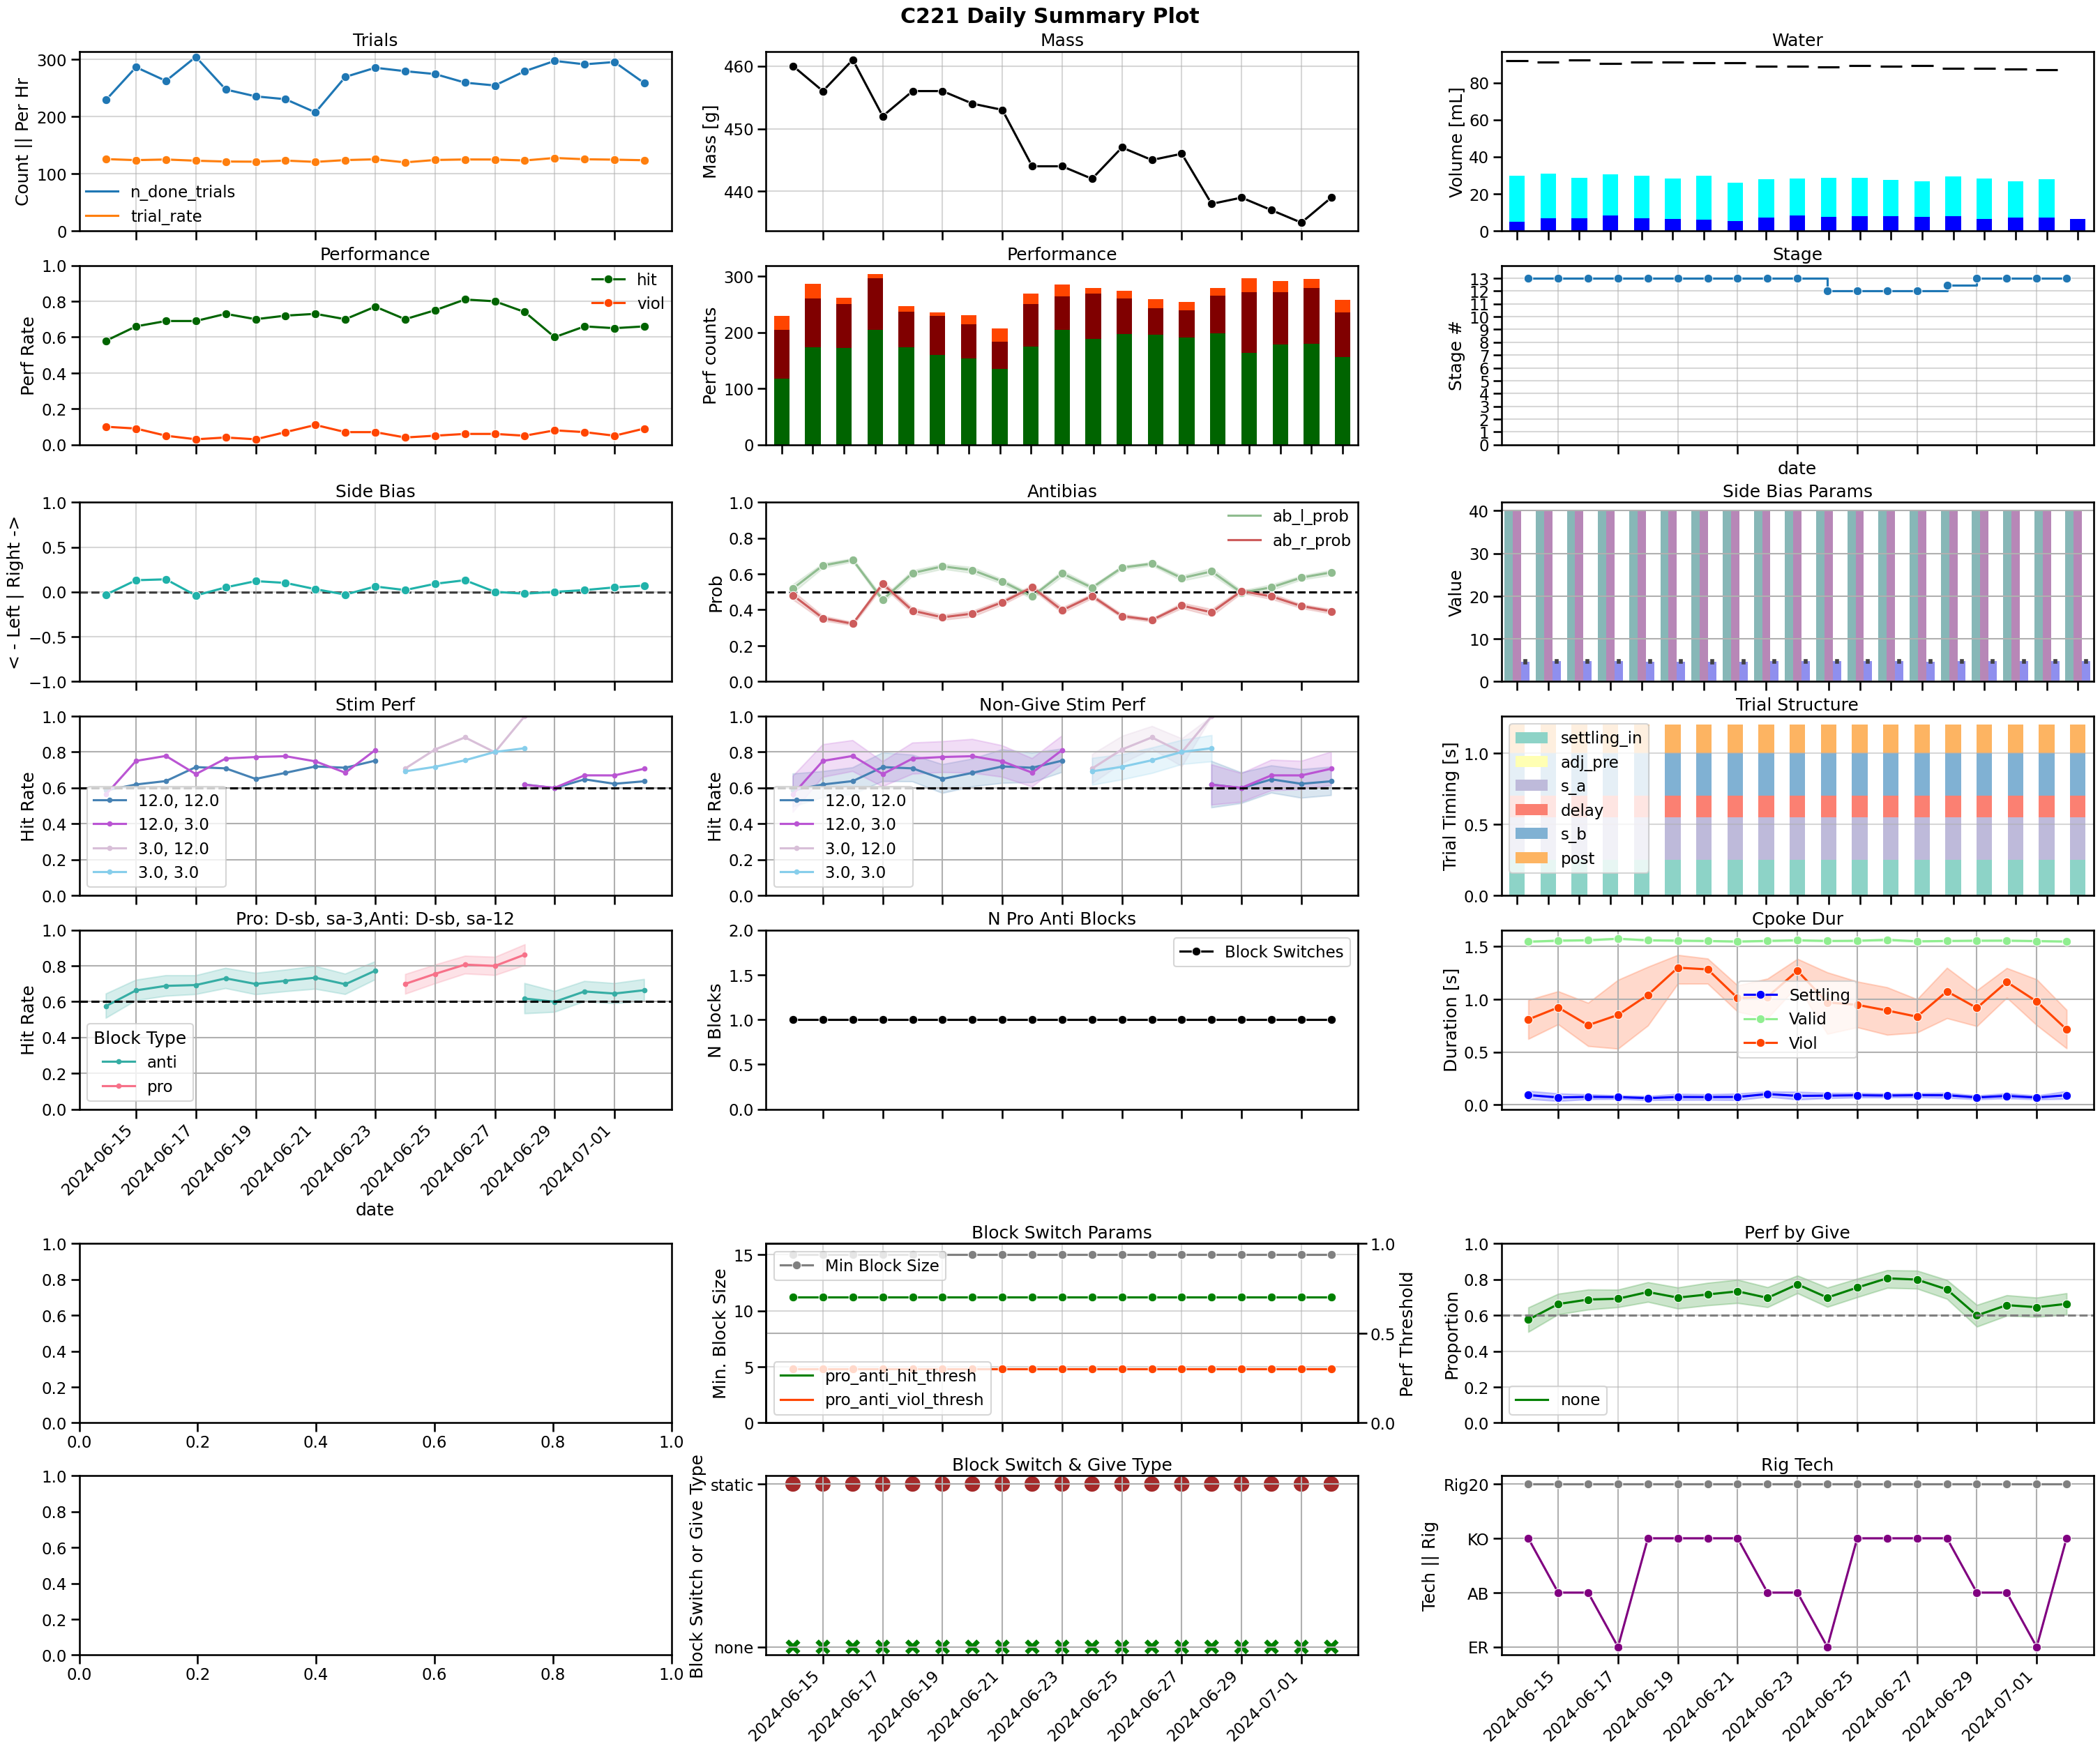

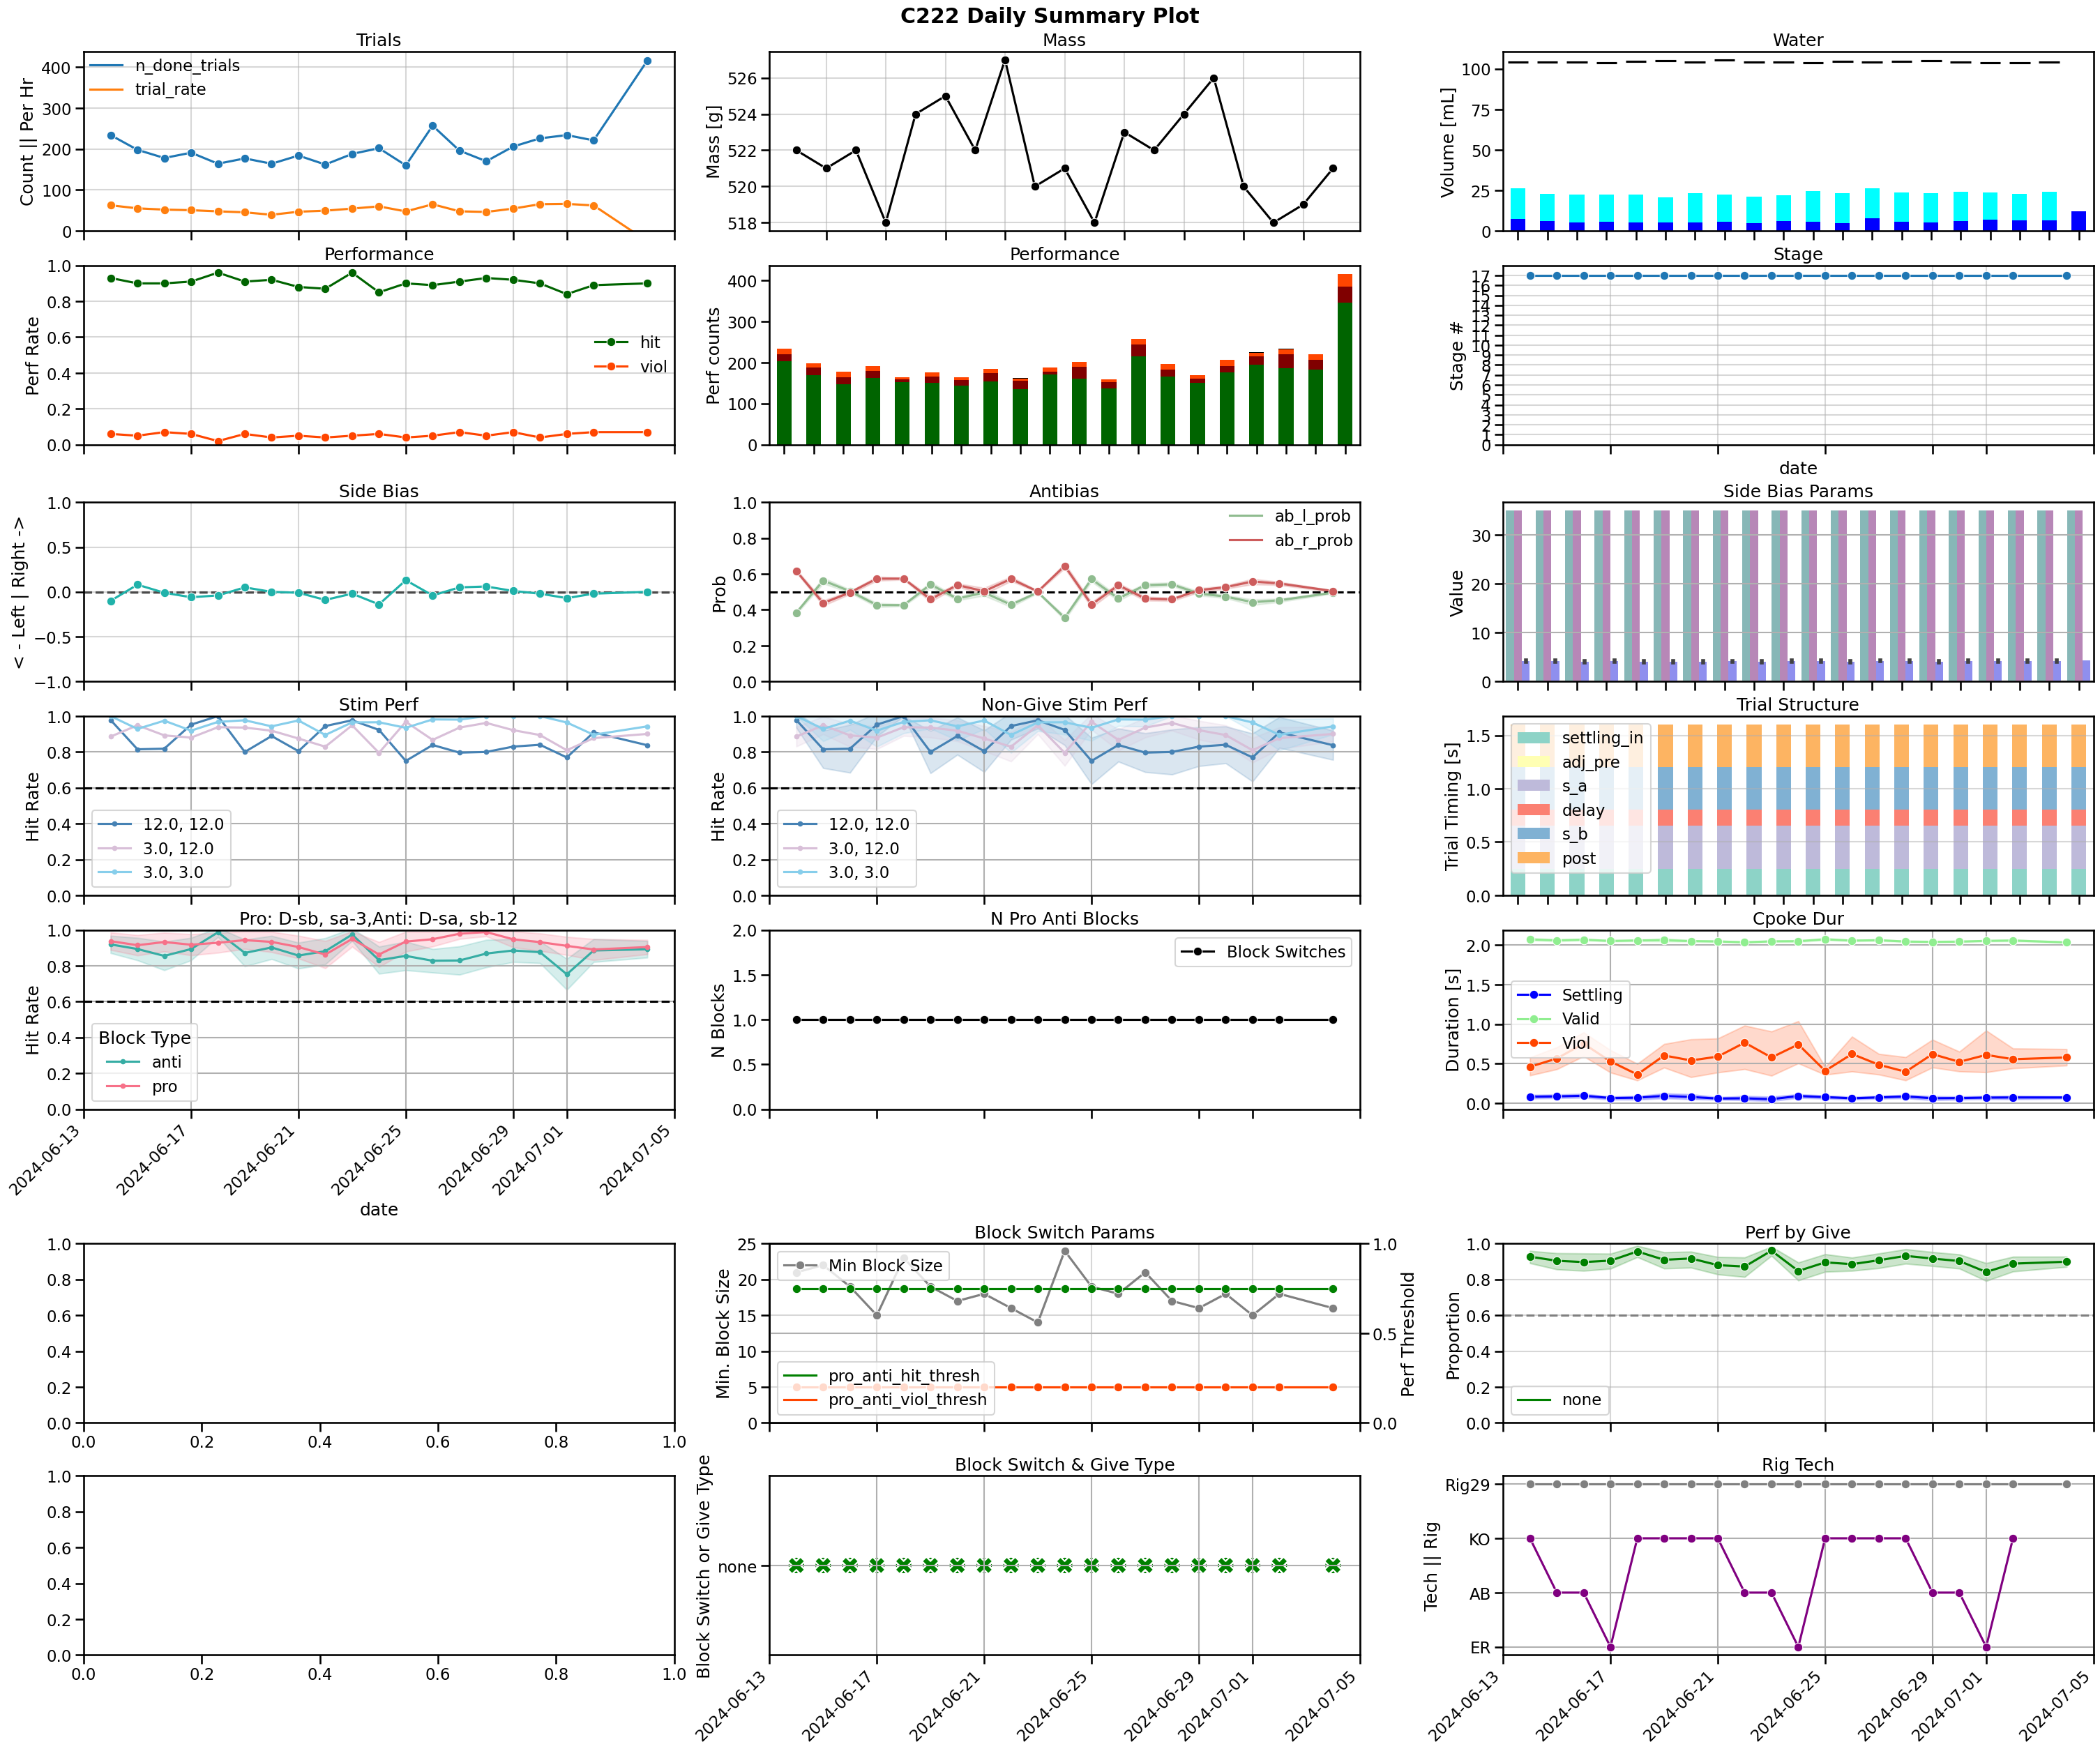

In [8]:
animals_on_recovery = ["C214", "C223"]
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    if animal_id in animals_on_recovery:
        continue
    multiplot_multi_day_summary(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )

In [52]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making C215_2024-06-28_day_summary
Fetched data from SessionAggDate table from 2024-06-28 to 2024-06-28  
No new data from 2024-07-04 to add to SessionAggDate.
['s_a', 'delay', 'post', 'go']
making C220_2024-06-28_day_summary
Fetched data from SessionAggDate table from 2024-06-28 to 2024-06-28  
No new data from 2024-07-04 to add to SessionAggDate.
['s_a', 'delay', 's_b', 'post', 'go']
making C221_2024-06-28_day_summary
Fetched data from SessionAggDate table from 2024-06-28 to 2024-06-28  
No new data from 2024-07-04 to add to SessionAggDate.
['s_a', 'delay', 's_b', 'go']
making C222_2024-06-28_day_summary
Fetched data from SessionAggDate table from 2024-06-28 to 2024-06-28  
No new data from 2024-07-04 to add to SessionAggDate.
['s_a', 's_b']
making C215_2024-06-29_day_summary
Fetched data from SessionAggDate table from 2024-06-29 to 2024-06-29  
No new data from 2024-07-04 to add to SessionAggDate.
['s_a', 'post', 'go']
making C221_2024-06-29_day_summary
Fetched data from SessionAggD

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


making C222_2024-07-02_day_summary
Fetched data from SessionAggDate table from 2024-07-02 to 2024-07-02  
No new data from 2024-07-04 to add to SessionAggDate.
['s_a', 's_b']
making C215_2024-07-04_day_summary
No data found on SessionAggDate for ['C215'] between 2024-07-04 and 2024-07-04
Today's data exits and has been added to SessionAggDate.
['s_a', 'delay', 's_b', 'go']


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


making C222_2024-07-04_day_summary
No data found on SessionAggDate for ['C222'] between 2024-07-04 and 2024-07-04
Today's data exits and has been added to SessionAggDate.
['s_a', 'delay', 's_b']


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
